In [ ]:
#1.数据挖掘流程

In [ ]:
1.数据读取
- 读取数据
- 统计指标
- 数据规模

2.数据探索（特征理解）
- 单特征的分析，逐个变量分析对结果y的影响（X与Y之间的相关性）
- 多变量分析（X与X之间的相关性）
- 统计绘图

3.数据清洗和预处理
- 缺失值填充
- 特征的标准化、归一化
- 特征工程（筛选有价值的特征）
- 特征之间的相关性（判断有没有共线性）

4.建立模型
- 特征数据和标签准备
- 数据集的切分
- 多种模型对比：交叉验证、调参（学习曲线，网格搜索）
- 集成算法（提升算法） XGBoost、GBDT、light-GBM、神经网络（多种集成）

5.模型评估

## 数据读取、探索、清洗和预处理

In [1]:
import numpy as np
import pandas as pd
#有这个语句，画完图不用写plt.show()，直接出图
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
#这个画图颜色更多
plt.style.use('fivethirtyeight')

import warnings #如果警告太多，用这个可以忽略警告
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data.describe().T#简单看一下统计指标

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
#数据探索
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

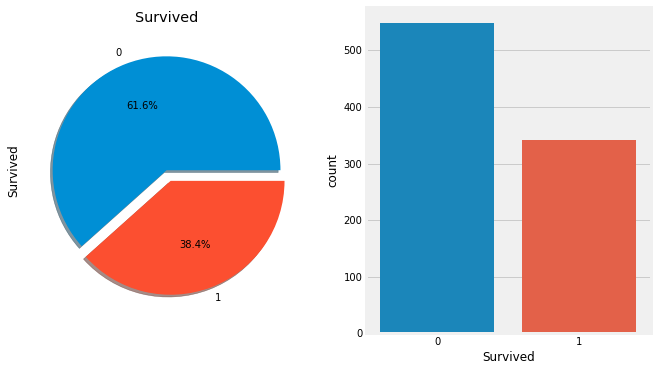

In [6]:
#分类数据最好画饼图，直方图，柱状图
f,ax = plt.subplots(1,2,figsize=(10,6))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                        autopct='%1.1f%%',#百分比保留一位小数
                                        ax=ax[0],shadow=True)
ax[0].set_title('Survived')


#直方图 分类型统计画法
sns.countplot('Survived',data=data,ax=ax[1])

In [7]:
#不同性别下的存活人数
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

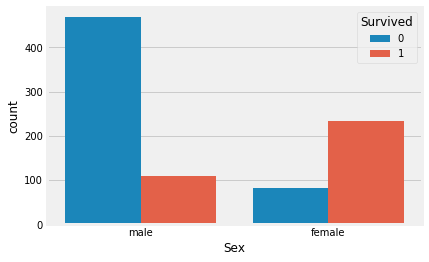

In [8]:
sns.countplot('Sex',hue='Survived',data=data)#hue对那一列计数

In [9]:
#Pclass船舱等级和获救的之间的关系
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')
#交叉表适合分类数据，margins是否对行和列汇总,style后面是设置背景颜色

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


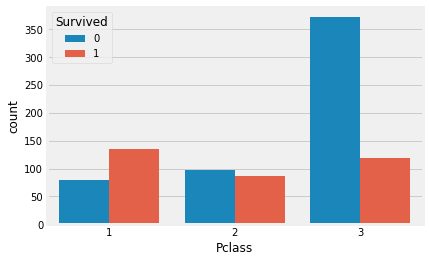

In [10]:
sns.countplot('Pclass',hue='Survived',data=data)

In [11]:
#结合性别、船舱等级和存活情况分析
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

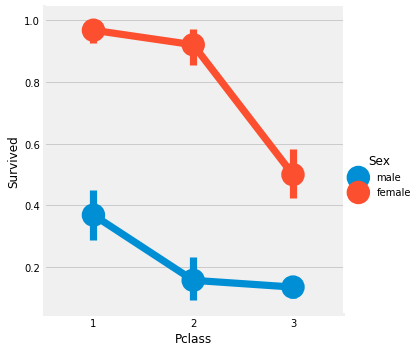

In [12]:
#画图,三个维度进行对比
sns.factorplot('Pclass','Survived',hue='Sex',data=data)    

In [13]:
#缺失值填充
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [14]:
data['initial'] = data.Name.str.extract('([A-Za-z]+)\.')#正则表达式提取字符串
data['initial']

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: initial, Length: 891, dtype: object

In [15]:
pd.crosstab(data.initial,data.Sex).T

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
re = []
for i in data.initial.values:
    if i!='Master' and i!='Miss' and i!='Mr' and i!='Mrs':
        re.append(i.replace(i,'other'))
    else:
        re.append(i)

In [17]:
data['re']=re
data.re.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'other'], dtype=object)

In [18]:
data.groupby('re')['Sex'].count()

re
Master     40
Miss      182
Mr        517
Mrs       125
other      27
Name: Sex, dtype: int64

In [19]:
data.groupby('re')['Age'].mean()#每个称谓下的平均年龄

re
Master     4.574167
Miss      21.773973
Mr        32.368090
Mrs       35.898148
other     42.384615
Name: Age, dtype: float64

In [20]:
int(data.groupby('re')['Age'].mean()[0])

4

In [21]:
for i in data.re.values:
    data.loc[(data.Age.isnull())&(data.re==i),'Age']=int(data.groupby('re')['Age'].mean()[i])

In [22]:
data.Age.isnull().sum()#年龄已填充

0

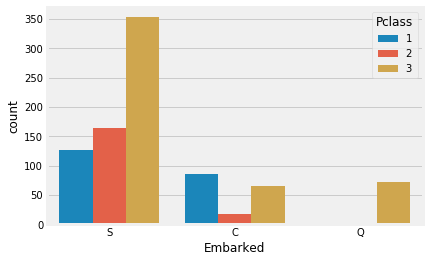

In [23]:
#分析Embarked
sns.countplot('Embarked',hue='Pclass',data=data)

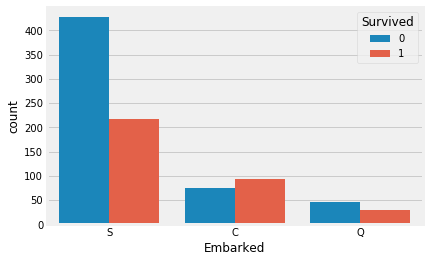

In [24]:
sns.countplot('Embarked',hue='Survived',data=data)

In [25]:
#填充缺失值
data['Embarked'].fillna('S',inplace=True)
data['Embarked'].isnull().sum()

0

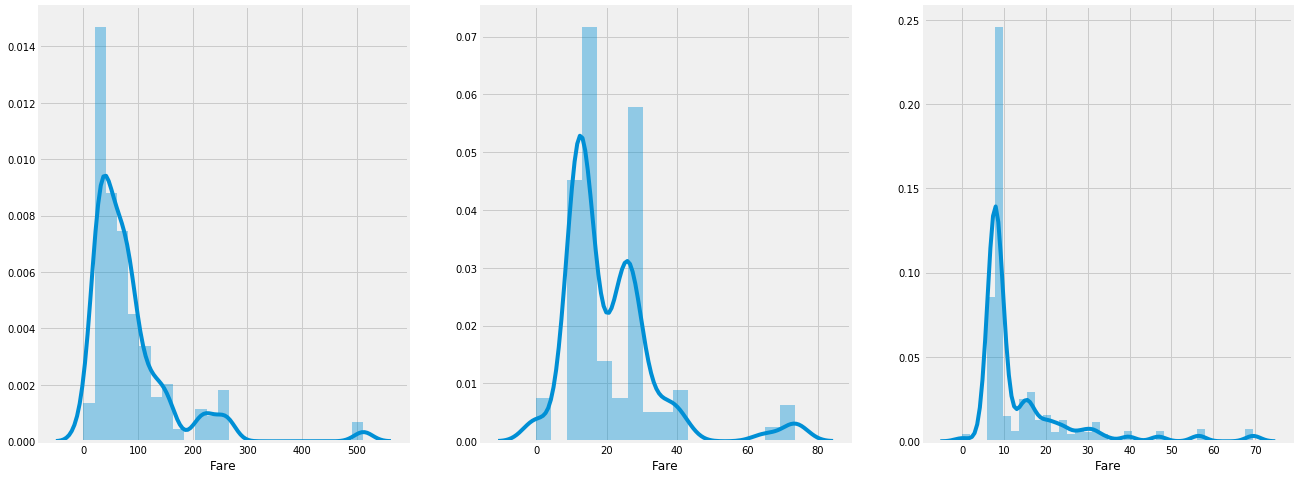

In [26]:
#对于连续型数据画图distplot
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])

In [27]:
#相关性热图
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.043358,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.089369,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.346011,0.083081,0.018443,-0.549500
Age,0.043358,-0.089369,-0.346011,1.000000,-0.268632,-0.195330,0.092215
SibSp,-0.057527,-0.035322,0.083081,-0.268632,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.195330,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.092215,0.159651,0.216225,1.000000


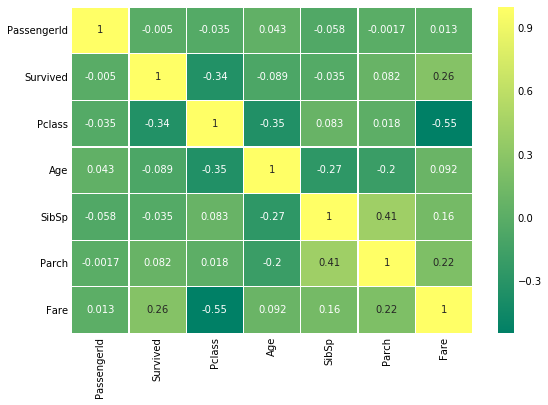

In [28]:
sns.heatmap(data.corr(),annot=True,linewidths=0.2,cmap='summer')
fig = plt.gcf()
fig.set_size_inches(8,6)

In [29]:
#plt.savefig('heatmap.png')#保存图片

In [30]:
#数据预处理
#对年龄分箱
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=65),'Age_band']=3
data.loc[data['Age']>65,'Age_band']=4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,re,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,2


In [31]:
#将非数值型变量转化为数值型
#将标签转化为0-1
from sklearn import preprocessing

In [32]:
lbl = preprocessing.LabelEncoder()
data['Sex']=lbl.fit_transform(data['Sex'])
data['Embarked']=lbl.fit_transform(data['Embarked'])
data['re']=lbl.fit_transform(data['re'])

In [33]:
#因为数字化有大小之分，对结果有影响，所以设置哑变量
#one_hot = preprocessing.OneHotEncoder()#实例化，这种方法数据只能是数字
#data['Embarked']=one_hot.fit_transform(data[['Embarked']])
one_hot=preprocessing.OneHotEncoder(sparse=False)
data['Embarked']=one_hot.fit_transform(data[['Embarked']])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,initial,re,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,Mr,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,Mrs,3,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0,Mrs,3,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,Mr,2,2


In [34]:
#删除不相关的变量
data.drop(['PassengerId','Name','Age','Ticket','Cabin','initial'],axis=1,
         inplace=True)

In [35]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,re,Age_band
0,0,3,1,1,0,7.2500,0.0,2,1
1,1,1,0,1,0,71.2833,1.0,3,2
2,1,3,0,0,0,7.9250,0.0,1,1
3,1,1,0,1,0,53.1000,0.0,3,2
4,0,3,1,0,0,8.0500,0.0,2,2


## 建模

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,LinearRegression

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [38]:
data.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,re,Age_band
0,0,3,1,1,0,7.2500,0.0,2,1
1,1,1,0,1,0,71.2833,1.0,3,2
2,1,3,0,0,0,7.9250,0.0,1,1
3,1,1,0,1,0,53.1000,0.0,3,2
4,0,3,1,0,0,8.0500,0.0,2,2
5,0,3,1,0,0,8.4583,0.0,2,1
6,0,1,1,0,0,51.8625,0.0,2,3
7,0,3,1,3,1,21.0750,0.0,0,0
8,1,3,0,0,2,11.1333,0.0,3,1
9,1,2,0,1,0,30.0708,1.0,3,0


In [39]:
#提取标签和特征，划分训练集和测试集
x = data.iloc[:,data.columns != 'Survived']
y = data.iloc[:,data.columns == 'Survived']

Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.3,random_state=420)

In [40]:
#逻辑回归效果
l = LogisticRegression()
l.fit(Xtrain,Ytrain)
#第一种方法
l.score(Xtest,Ytest)

0.8134328358208955

In [41]:
#第二种方法
pred_1 = l.predict(Xtest)
metrics.accuracy_score(Ytest,pred_1)

0.8134328358208955

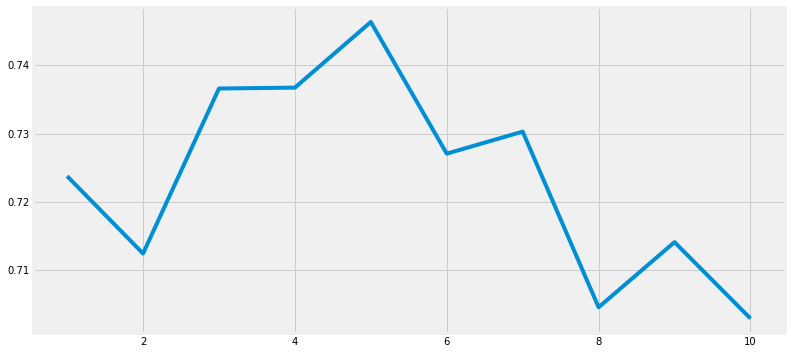

In [42]:
#KNN调参
score = []

for i in list(range(1,11)):
    KNN = KNeighborsClassifier(n_neighbors=i)
    CVS = cross_val_score(KNN,Xtrain,Ytrain,cv=5)
    score.append(CVS.mean())
    
plt.plot([*range(1,11)],score)
fig = plt.gcf()
fig.set_size_inches(12,6)

In [43]:
max(score)

0.7463547363031233

In [46]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(Xtrain,Ytrain)
KNN.score(Xtest,Ytest)

0.7597765363128491

In [44]:
#网格搜索调整参数
from sklearn.model_selection import GridSearchCV

In [45]:
#设置可选参数
param_grid = {'criterion':['entropy','gini'],
             'max_depth':range(2,10),
             'min_samples_leaf':range(1,10),
             'min_samples_split':range(2,10)}

#设置网格
GR = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

#建模
GR.fit(Xtrain,Ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': range(2, 10), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
#输出接口
GR.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 9,
 'min_samples_split': 2}

In [47]:
GR.best_score_

0.8250401284109149

In [52]:
#决策树效果
DTC = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=9,min_samples_split=2).fit(Xtrain,Ytrain)
DTC.score(Xtest,Ytest)

0.832089552238806

In [53]:
#分析特征重要性
DTC.feature_importances_

array([0.18587253, 0.50266299, 0.0856661 , 0.00126725, 0.15563076,
       0.00171937, 0.06112604, 0.00605496])

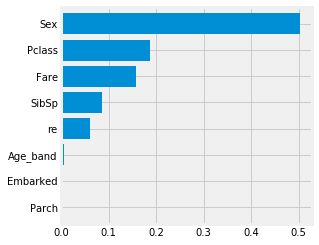

In [55]:
f = plt.figure(figsize=(4,4))
DTC = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=9,min_samples_split=2).fit(Xtrain,Ytrain)
pd.Series(DTC.feature_importances_,x.columns).sort_values(ascending=True).plot.barh(width=0.8)

### ROC曲线

In [56]:
#ROC曲线只能画二分类数据，不能是多分类
y_pred = DTC.predict(Xtest)

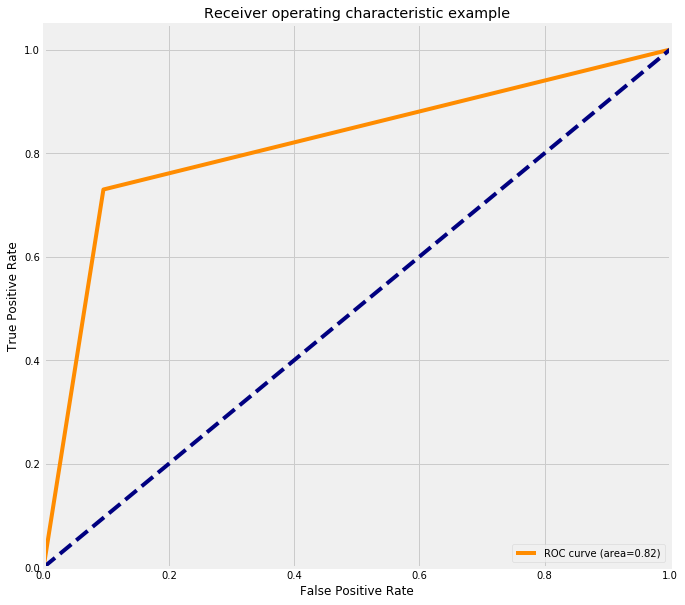

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_curve,auc
#计算真正率和假正率
fpr,tpr,threshold = roc_curve(Ytest,y_pred)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='darkorange',label = 'ROC curve (area=%0.2f)'%roc_auc)#假正率为横坐标，真正率是纵坐标


#中间0.5分界线
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')

### 混淆矩阵

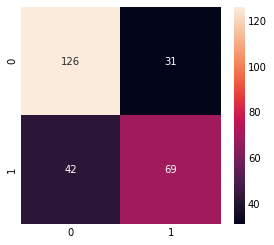

In [58]:
plt.figure(figsize=(4,4))
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(Xtrain,Ytrain)
y_pred =KNN.predict(Xtest)
sns.heatmap(confusion_matrix(Ytest,y_pred),annot=True,fmt='2.0f')

#另一种方法 交叉验证方法
#from sklearn.model_selection import cross_val_predict
#y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=3),Xtest,Ytest,cv=10)
#sns.heatmap(confusion_matrix(Ytest,y_pred),annot=True,fmt='2.0f')

In [59]:
#导入决策树模型，大概看一下效果
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.7873134328358209

In [61]:
#交叉验证效果
score = cross_val_score(clf,Xtrain,Ytrain,cv=10).mean()
score

0.7927483358934972

In [62]:
var_ = cross_val_score(clf,Xtrain,Ytrain,cv=10).var()
var_

0.0029104317975889634

In [63]:
#在不同的max_depth下的模型拟合情况
a = [] 
b = [] 
for i in range(10):
       
    clf = DecisionTreeClassifier(random_state=25,max_depth=i+1)
    clf = clf.fit(Xtrain,Ytrain)
    score = clf.score(Xtest,Ytest)
    mean_ = cross_val_score(clf,Xtrain,Ytrain,cv=10).mean()                            
    a.append(score)
    b.append(mean_)
                                 

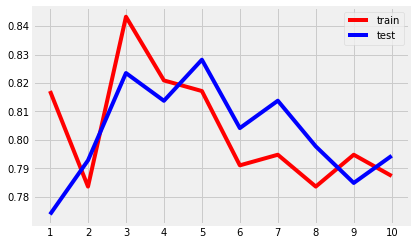

In [64]:
plt.plot(range(1,11),a,color="red",label="train") 
plt.plot(range(1,11),b,color="blue",label="test") 
plt.xticks(range(1,11)) 
plt.legend() 
plt.show()


In [65]:
#集成算法
from sklearn.ensemble import BaggingClassifier

In [67]:
model = BaggingClassifier(base_estimator=DTC,
                         n_estimators=700,
                         random_state=420)
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)

0.835820895522388